In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Euler Maruyama Method

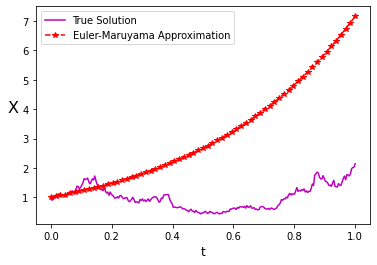

Euler-Maruyama error: 5.023640850170661


In [14]:


# Set random seed
np.random.seed(100)

# SDE parameters
lambda_val = 2
mu = 1
Xzero = 1

# Simulation parameters
T = 1
N = 2**8
dt = 1/N

# Discretized Brownian path
dW = np.sqrt(dt) * np.random.randn(1, N)
W = np.cumsum(dW)

# True solution
Xtrue = Xzero * np.exp((lambda_val - 0.5 * mu**2) * np.arange(dt, T + dt, dt) + mu * W)

# Plot true solution
plt.plot(np.arange(0, T + dt, dt), [Xzero] + list(Xtrue), 'm-', label='True Solution')

# Euler-Maruyama parameters
R = 4
Dt = R * dt
L = int(N / R)

# Initialize variables for efficiency
Xem = np.zeros(L)
Xtemp = Xzero

# Euler-Maruyama method
for j in range(L):
    Winc = np.sum(dW[R * (j - 1) + 1:R * j])
    Xtemp = Xtemp + Dt * lambda_val * Xtemp + mu * Xtemp * Winc
    Xem[j] = Xtemp

# Plot Euler-Maruyama approximation
plt.plot(np.arange(0, T + Dt, Dt), [Xzero] + list(Xem), 'r--*', label='Euler-Maruyama Approximation')
plt.legend()
plt.xlabel('t', fontsize=12)
plt.ylabel('X', fontsize=16, rotation=0, ha='right')
plt.show()

# Calculate and print Euler-Maruyama error
emerr = np.abs(Xem[-1] - Xtrue[-1])
print(f"Euler-Maruyama error: {emerr}")


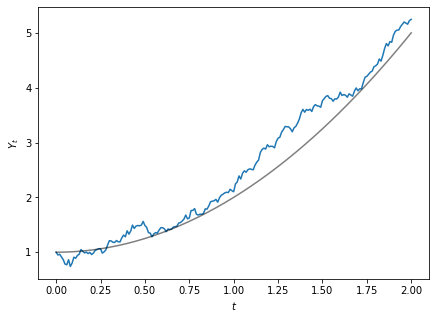

In [186]:
# Define the time discretisation
t_0 = 0
T = 2
N = 200
delta = (T-t_0)/N
steps = np.arange(0, N+1)
t = t_0 + steps*delta

# Set initial condition and pre-allocate Y sequence into an array
Y_0 = 1
Y = np.zeros(N+1)
Y[0] = Y_0

# define drift and diffusion coefficients
def get_drift(X: float, t: float) -> float:
    return 2*t

def get_diffusion(X: float, t: float) -> float:
    return 0.5

for n in steps[:-1]:  # Compute until N-1
    tau_n = t[n]  # get time step n
    Y_n = Y[n]  # get Y at n
    
    mu = get_drift(X=Y_n, t=tau_n)  # in this case, mu = 2*tau
    sigma = get_diffusion(X=Y_n, t=tau_n)  # in this case, sigma = 0.5
   
    # Compute Brownian increment, recall standard deviation = sqrt(variance)
    # in this case, variance = \tau_{n+1} - \tau_{n} = \delta 
    dW = np.random.normal(loc=0, scale=np.sqrt(delta))
    
    # Compute next step of the EM scheme
    Y[n+1] = Y_n + mu*delta + sigma*dW

# Plot the random path obtained and the drift of the SDE
fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(t, Y)
ax.plot(t, 1+t**2, color="black", alpha=0.5)

ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$Y_t$")

plt.show()

## Polar Coordinates

In [173]:
def solve_ode_rtheta(r0, theta0, a, f, num_steps, dt):
    r_values, theta_values = [], []
    r, theta = r0, theta0
    for _ in range(num_steps):
        drdt = r * (a - r**2)
        dthetadt = 2 * np.pi * f
        r += drdt * dt
        theta += dthetadt * dt
        
        # Ensure theta stays within the range [-pi, pi]
        theta = np.mod(theta, 2 * np.pi)
        if theta > np.pi:
            theta -= 2 * np.pi
        elif theta < -np.pi:
            theta += 2 * np.pi
        
        r_values.append(r)
        theta_values.append(theta)
    return r_values, theta_values


def get_z_values(r_values, theta_values):
    x_values = np.array(r_values) * np.cos(theta_values)
    y_values = np.array(r_values) * np.sin(theta_values)
    z_values = np.sqrt(x_values**2 + y_values**2)
    return z_values

def plot_polar_cord(a, f):
# Parameters
    r0 = 0.1
    theta0 = 0
    num_steps = 1000
    dt = 0.1

    # Solve ODE
    r_values, theta_values = solve_ode_rtheta(r0, theta0, a, f, num_steps, dt)
    z_values = get_z_values(r_values, theta_values)

    # # Plot r
    # plt.figure(figsize=(10, 5))
    # plt.plot(r_values, label='r')
    # plt.xlabel('Time Steps')
    # plt.ylabel('r')
    # plt.title('Solution of ODE for r')
    # plt.legend()
    # plt.grid(True)
    # plt.show()

    # # Plot theta
    # plt.figure(figsize=(10, 5))
    # plt.plot(theta_values, label='theta')
    # plt.xlabel('Time Steps')
    # plt.ylabel('theta')
    # plt.title('Solution of ODE for theta')
    # plt.legend()
    # plt.grid(True)
    # plt.show()

    # Plot z
    plt.figure(figsize=(10, 5))
    plt.plot(z_values, label='Z')
    plt.xlabel('Time Steps')
    plt.ylabel('Z')
    plt.title('Solution of ODE for Z')
    plt.legend()
    plt.grid(True)
    plt.show()

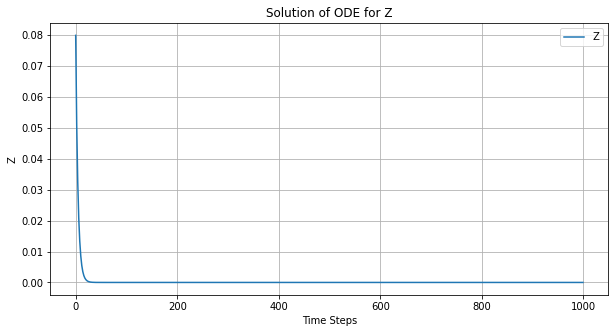

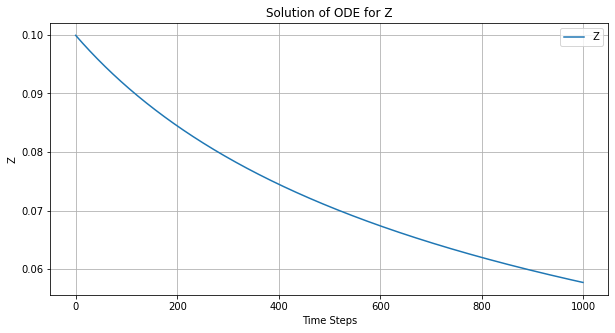

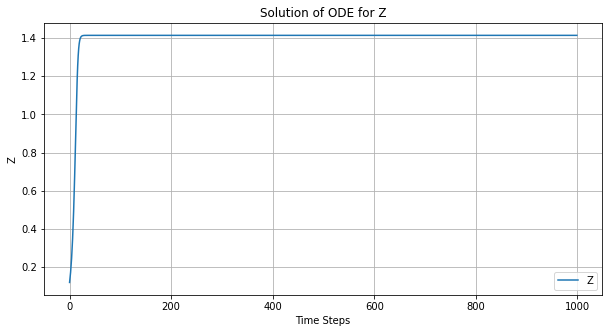

In [174]:
plot_polar_cord(-2, 12)
plot_polar_cord(0, 12)
plot_polar_cord(2, 12)

## Cartesian coordinates

In [148]:
def landau_stuart_ode(x0, y0, a, f, num_steps, dt, beta):

    x_values, y_values = [], []
    x, y = x0, y0
    omega = f*2*np.pi

    for _ in range(num_steps):
        # Generate a single random noise term
        noise = np.random.normal(loc=0.0, scale=np.sqrt(dt))

        dxdt = (a-x**2-y**2)*x - omega*y 
        dydt = (a-x**2-y**2)*y + omega*x 
        x += dxdt * dt + beta * noise
        y += dydt * dt + beta * noise

        x_values.append(x)
        y_values.append(y)

    return x_values, y_values

Solution of ODEs for Different a Value

In [135]:
def plot_ls_model(a_values, f):
    x0 = 0.5
    y0 = 0.5
    num_steps = 10000
    dt = 0.001
    beta = 1  # Intensity of noise
    omega = 2 * np.pi * f

    # Generate time array
    time = np.arange(0, num_steps * dt, dt)

    # Create a subplot for each a value
    fig, axes = plt.subplots(len(a_values), 1, figsize=(8, 4), sharex=True)

    if len(a_values) == 1:  # Ensure axes is iterable when there's only one subplot
        axes = [axes]

    for i, a in enumerate(a_values):
        x_values, y_values = landau_stuart_ode(x0, y0, a, f, num_steps, dt, beta)
        # Plot x_values in the i-th subplot
        axes[i].plot(time, x_values, label=f'a={a}')
        axes[i].set_ylabel('X values')
        axes[i].legend()
        axes[i].set_xlabel('Time (s)')
        # axes[i].set_title(f'Solution of ODE for a={a}')


    # plt.suptitle(f'Solution of ODEs for Different a Values, f={f}', fontsize=10)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


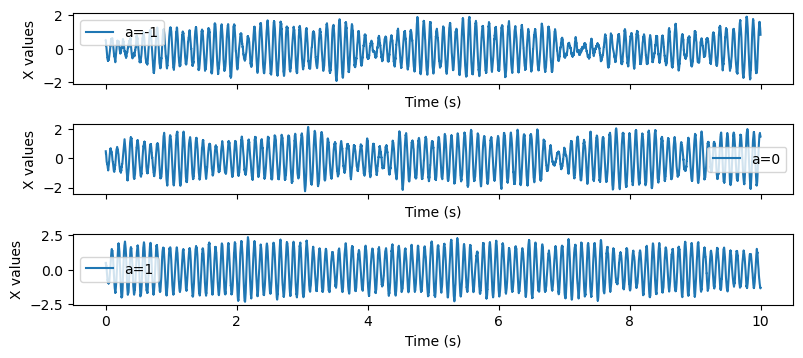

In [136]:
a_values = [-1, 0, 1]
f = 10  # Example frequency
plot_ls_model(a_values, f)

### Varying Noise (Beta)

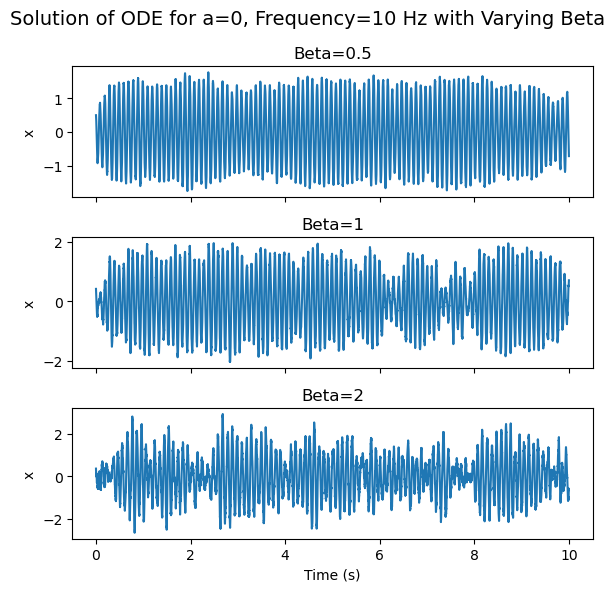

In [158]:
def plot_varying_beta(a, beta_values, fixed_frequency, num_steps=10000, dt=0.001):
    x0 = 0.5
    y0 = 0.5
    omega = 2 * np.pi * fixed_frequency
    time = np.arange(0, num_steps * dt, dt)
    
    # Create figure and subplots for varying beta
    fig, axes = plt.subplots(len(beta_values), 1, figsize=(6, 2 * len(beta_values)), sharex=True)
    
    if len(beta_values) == 1:  # Ensure axes is iterable when there's only one subplot
        axes = [axes]
    
    for i, beta in enumerate(beta_values):
        x_values, y_values = landau_stuart_ode(x0, y0, a, fixed_frequency, num_steps, dt, beta)
        axes[i].plot(time, x_values)
        axes[i].set_title(f'Beta={beta}')
        axes[i].set_ylabel('x')
        
    axes[-1].set_xlabel('Time (s)')
    fig.suptitle(f'Solution of ODE for a={a}, Frequency={fixed_frequency} Hz with Varying Beta', fontsize=14)
    plt.tight_layout()
    plt.show()

a = 0
beta_values = [0.5, 1, 2]  # Example beta values to vary
fixed_frequency = 10  # Example fixed frequency
plot_varying_beta(a, beta_values, fixed_frequency)


### Figure for Varying Frequency

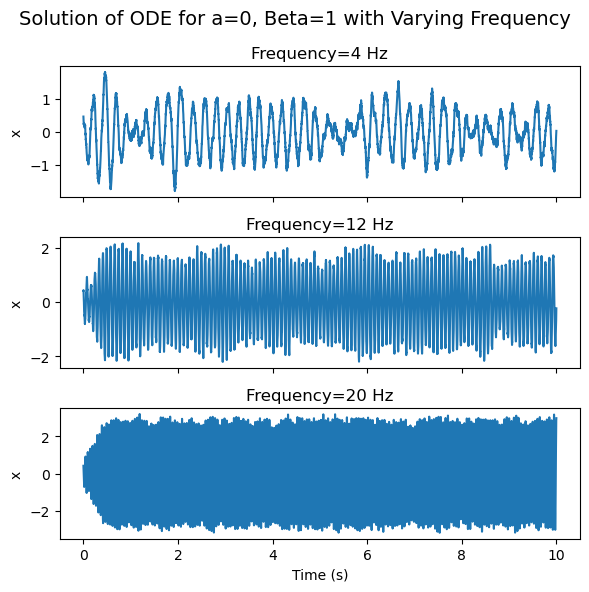

In [161]:
def plot_varying_frequency(a, fixed_beta, frequency_values, num_steps=10000, dt=0.001):
    x0 = 0.5
    y0 = 0.5
    time = np.arange(0, num_steps * dt, dt)
    
    # Create figure and subplots for varying frequency
    fig, axes = plt.subplots(len(frequency_values), 1, figsize=(6, 2 * len(frequency_values)), sharex=True)
    
    if len(frequency_values) == 1:  # Ensure axes is iterable when there's only one subplot
        axes = [axes]
    
    for i, f in enumerate(frequency_values):
        omega = 2 * np.pi * f
        x_values, y_values = landau_stuart_ode(x0, y0, a, f, num_steps, dt, fixed_beta)
        axes[i].plot(time, x_values)
        axes[i].set_title(f'Frequency={f} Hz')
        axes[i].set_ylabel('x')
        
    axes[-1].set_xlabel('Time (s)')
    fig.suptitle(f'Solution of ODE for a={a}, Beta={fixed_beta} with Varying Frequency', fontsize=14)
    plt.tight_layout()
    plt.show()

a = 0
fixed_beta = 1  # Example fixed beta
frequency_values = [4, 12, 20]  # Example frequency values to vary
plot_varying_frequency(a, fixed_beta, frequency_values)


### Integration of Euler-Maruyama and Wilson Cowan 

In [51]:
def wc_ode(e0, i0, p_i, num_steps, dt, beta=0):

    e_values, i_values =  [], []
    e, i = e0, i0
    tau_e = 3
    tau_i = 8
    w_ee = 10
    w_ei = 12
    w_ii = 10
    w_ie = 10
    p_e = 0

    f_a = lambda x: 1 / (1 + np.exp(-x))
    
    for _ in range(num_steps):
        # Generate a single random noise term
        noise = np.random.normal(loc=0.0, scale=np.sqrt(dt))

        dedt = (-e + f_a(w_ee*e - w_ei*i + p_e))/tau_e
        didt = (-i + f_a(w_ie*e - w_ii*i + p_i))/tau_i

        e += dedt * dt + beta * noise
        i += didt * dt + beta * noise

        e_values.append(e)
        i_values.append(i)
    return e_values, i_values

In [105]:
def plot_ei(p_i):
    e0 = 0.5
    i0 = 0.5
    num_steps = 100000
    dt = 0.01
    beta = 0.0001  # Intensity of noise

    e_values, i_values = wc_ode(e0, i0, p_i, num_steps, dt, beta)

    # Create subplots
    fig, axes = plt.subplots(2, 1, figsize=(10, 3))

    # Plot x
    axes[0].plot(e_values, label='E')
    axes[0].set_xlabel('Time Steps')
    axes[0].set_ylabel('E')
    axes[0].set_title('Solution of Wilson-Cowan ODE for E')
    # axes[0].legend()


    # Plot y
    axes[1].plot(i_values, label='I')
    axes[1].set_xlabel('Time Steps')
    axes[1].set_ylabel('I')
    axes[1].set_title('Solution of Wilson-Cowan ODE for I')
    # axes[1].legend()

    fig.suptitle(f'Wilson-Cowan ODE solution for pi={p_i}', fontsize=10)
    # Adjust layout
    plt.tight_layout()
    plt.show()


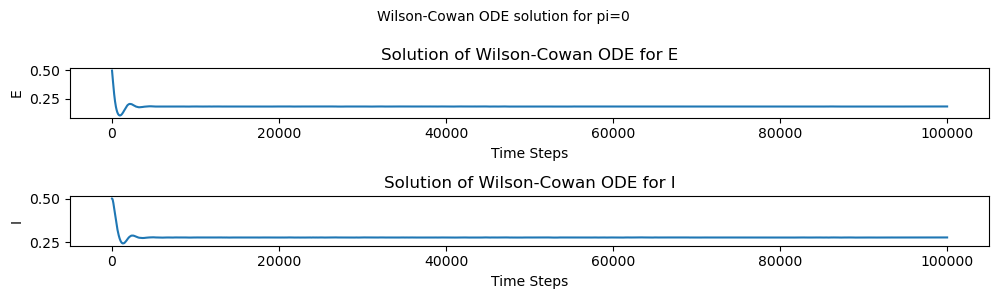

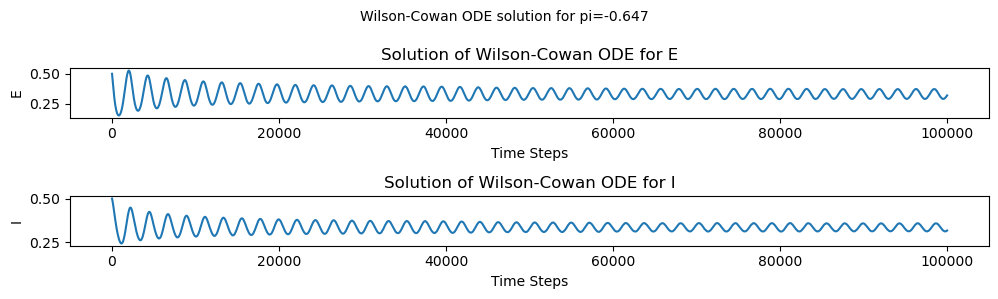

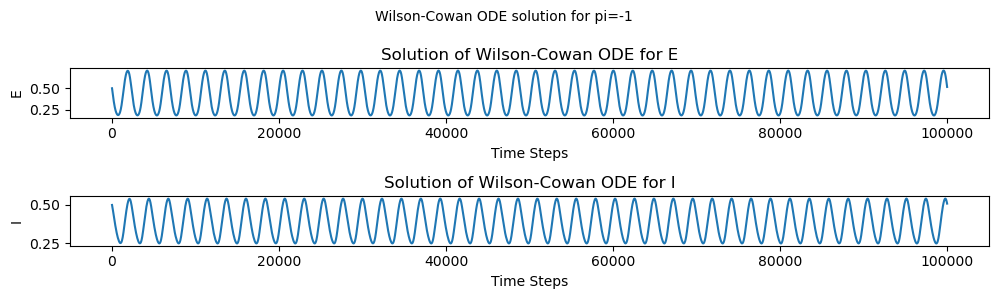

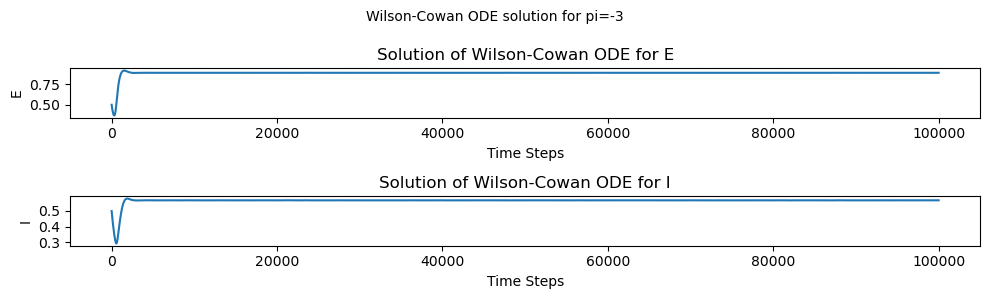

In [106]:
plot_ei(0)
plot_ei(-0.647)
plot_ei(-1)
plot_ei(-3)

### .NODE file 

In [107]:
import pandas as pd
from io import StringIO


# Define the path to your .node file
node_file_path = '../references/AAL78/AAL78.node'

df = pd.read_csv(node_file_path, sep='\s+', header=None, names=['x', 'y', 'z', 'value', 'label'])

# Filter out the rows for the left frontal inferior orbital area (ORBinf.L)
left_frontal_inf_orbital = df[df['label'] == 'ORBinf.L']

# Filter out the rows for the left inferior parietal area (IPL.L)
left_inferior_parietal = df[df['label'] == 'IPL.L']

# Now you have the regions in two separate DataFrames
print("Left Frontal Inferior Orbital Area:")
print(left_frontal_inf_orbital)
print("\nLeft Inferior Parietal Area:")
print(left_inferior_parietal)



Left Frontal Inferior Orbital Area:
            x      y    z  value     label
-35.98  30.71 -12.11  1.0    1.0  ORBinf.L

Left Inferior Parietal Area:
           x      y    z  value  label
-42.8 -45.82  46.74  1.0    1.0  IPL.L


In [108]:
label_counts = df.groupby('label').size()
print(label_counts)

label
ACG.L       1
ACG.R       1
ANG.L       1
ANG.R       1
CAL.L       1
           ..
STG.R       1
TPOmid.L    1
TPOmid.R    1
TPOsup.L    1
TPOsup.R    1
Length: 78, dtype: int64
